In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Sales_Channel.csv")

In [3]:
data.head()

,i,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
adv=data.drop(["i"],axis=1)

In [5]:
adv.shape

(200, 4)

In [6]:
adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#To check Duplicate
adv.duplicated().sum()

0

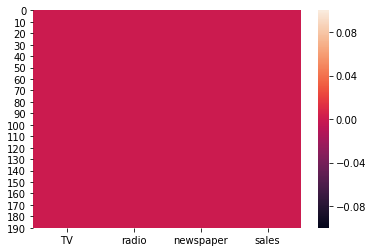

In [9]:
#To check Missing values
sns.heatmap(adv.isnull())

In [10]:
adv.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Summary Statistics

In [11]:
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
#Check Correlation
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


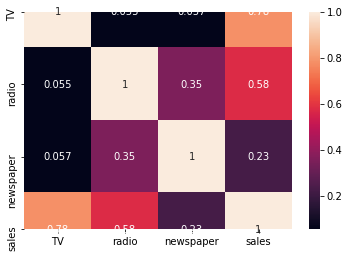

In [13]:
sns.heatmap(adv.corr(),annot=True)

Plotting Outliers

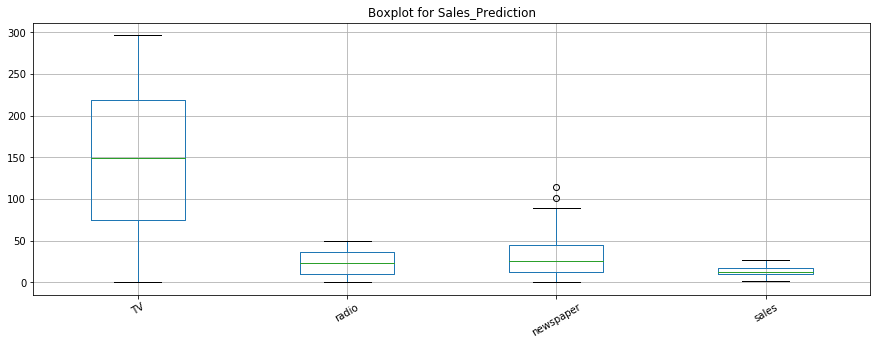

In [14]:
adv.plot(kind='box',grid=True,title="Boxplot for Sales_Prediction",legend=True,rot=30,figsize=(15,5))

In [15]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(adv))
adv=adv.loc[(z_score < 3).all(axis=1)]

In [16]:
#check skewsness
adv.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [17]:
for col in adv.columns:
    if adv.skew().loc[col] > 0.55:
        adv[col]=np.log1p(adv[col])

In [18]:
adv.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.839481
sales        0.407130
dtype: float64

Exploring Data

In [19]:
adv.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,4.251348,22.1
1,44.5,39.3,3.830813,10.4


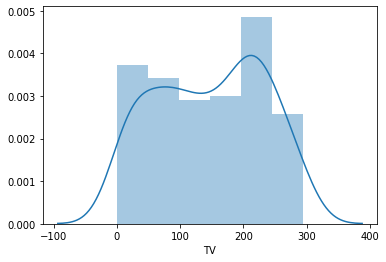

In [20]:
#TV
sns.distplot(adv["TV"])

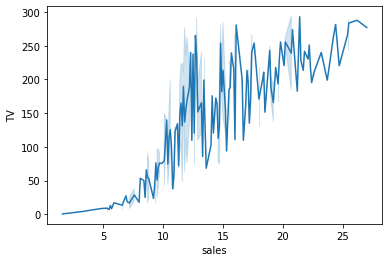

In [21]:
sns.lineplot(x="sales",y="TV",data=adv)

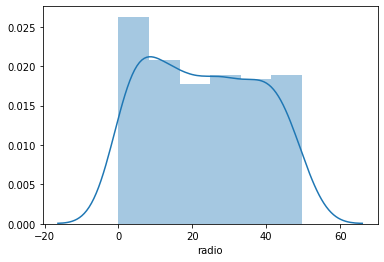

In [22]:
#Radio
sns.distplot(adv["radio"])

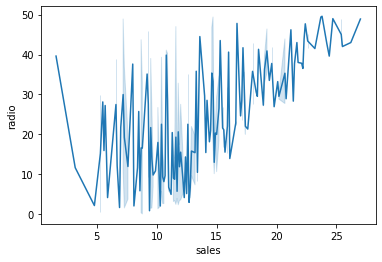

In [23]:
sns.lineplot(x="sales",y="radio",data=adv)

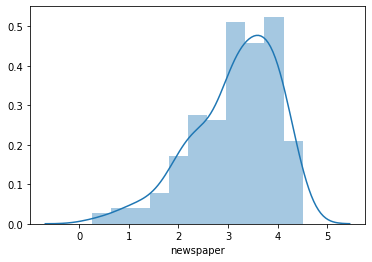

In [24]:
#Newspaper
sns.distplot(adv['newspaper'])

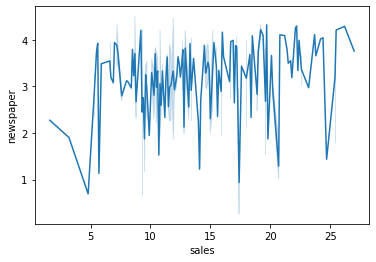

In [25]:
sns.lineplot(x="sales",y="newspaper",data=adv)

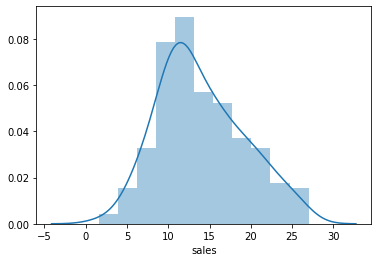

In [26]:
#Sales
sns.distplot(adv["sales"])

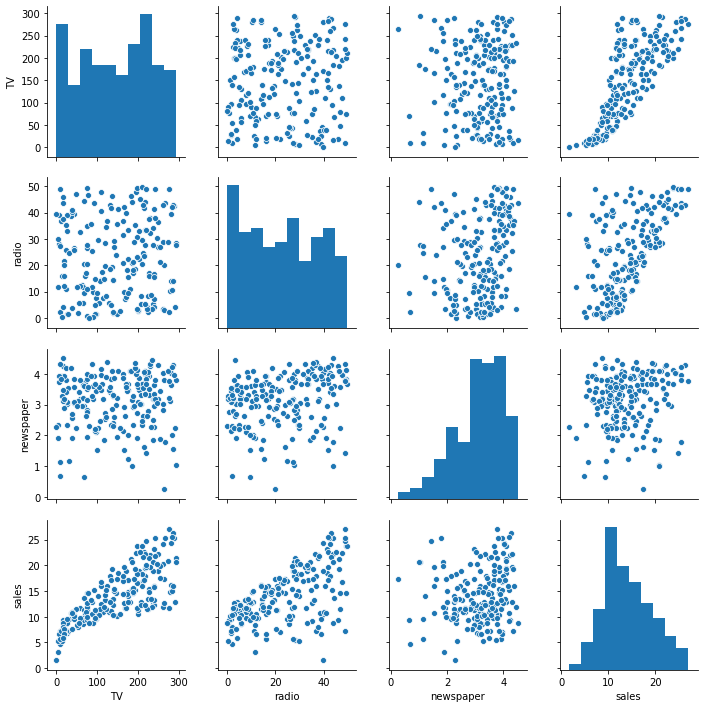

In [27]:
sns.pairplot(adv)

Features and Target Value

In [28]:
x=adv.drop(["sales"],axis=1)
y=adv["sales"]

In [29]:
x.head(2)

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813


In [30]:
y.head(2)

0    22.1
1    10.4
Name: sales, dtype: float64

Standardisation

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [32]:
x=sc.fit_transform(x)
x

array([[ 9.78697339e-01,  9.89521352e-01,  1.30283653e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.10861749e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.30450183e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.10937158e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.10740374e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.39570727e+00],
       [-1.04647815e+00,  6.52242599e-01,  7.13357030e-02],
       [-3.10797368e-01, -2.38173309e-01, -7.06604985e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.85982224e+00],
       [ 6.23176960e-01, -1.38492107e+00, -4.39917715e-02],
       [-9.45571378e-01, -1.16906267e+00,  1.04292173e-01],
       [ 7.98003813e-01,  5.86319933e-02, -1.78787450e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.24650770e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.20914059e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.33480919e-01],
       [ 5.71550238e-01,  1.65733328e+00,  9.93734078e-01],
       [ 1.58061798e+00,  1.11094170e+00

Spilt Train and Test

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    print()
    print('prediction: ',pred)
    return random_state

LinearRegression

In [35]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x000000864F9AF948> 
is:  90 
and it produces 
 r2 score of  0.8258107779169176 
 mean abs error value of  1.5254947381846535 
 mean squared error value of 5.270789735576189 
 & root mean sq error  2.2958200573163805

prediction:  [ 9.95027634 12.860516   11.15773199 12.37979555 21.18742149  8.90542598
 12.87285142 16.48049568 19.12303506 13.64643593  9.63673871  4.71556751
 19.20019484  9.86378419 16.18444787 16.14341783 20.28368063  8.66037174
 17.1721743   9.45075746 16.63956532  9.2808973  13.61312775 13.8028022
 21.6180094  12.47193913 10.61505718 17.4831667   3.85885799 11.29151858
 23.96981085  9.76516825  9.71937059  5.8655219  13.19298096 16.26005336
 11.53595521 16.05554888 14.28230219 12.06672705 16.35025682 17.96230465
  4.78051762  9.30051358 19.44423505 10.25156845  9.66650683 11.4736109
 23.40728631  7.17288546 12.18184189 18.10131616 13.41092833 16.84784281
 14.77762802 16.21714075 17.65795425 17.27814655 23.02519796  9.4961798 ]


90

In [36]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.8494423301634815


Decision Tree Regressor

In [37]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=30)
dtr_grid.fit(x,y)
dtr_grid.best_params_

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 5}

In [38]:
dtr=DecisionTreeRegressor(criterion='mae',max_depth=5)
mod(dtr,x,y)

the random state at  <function mod at 0x000000864F9AF948> 
is:  148 
and it produces 
 r2 score of  0.9445825831736318 
 mean abs error value of  1.0408333333333337 
 mean squared error value of 1.6768750000000006 
 & root mean sq error  1.2949420836469872

prediction:  [12.9  12.55  8.25  8.25 19.7   9.7   9.3  17.2  19.7  11.6  12.9   6.95
 19.7  11.8  14.9  17.2  19.2   9.7  17.05 11.8  14.9   9.7   9.3  14.9
 22.4  12.55 12.9  17.2   4.8   5.65 25.4  11.8   8.25  5.65 11.8  17.05
  5.65 13.45 17.2  11.8  14.9  19.7   6.95  5.65 19.7   9.7   5.65  5.65
 25.4   9.7  12.9  19.7  10.85 19.2  14.9  14.9  19.2  15.9  25.4  11.8 ]


148

In [39]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=30,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.9279305796576189


KNeighbors Regressor

In [40]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=30)
k_grid.fit(x,y)
k_grid.best_params_

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'ball_tree', 'n_neighbors': 8}

In [41]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=8)
mod(knr,x,y)

the random state at  <function mod at 0x000000864F9AF948> 
is:  52 
and it produces 
 r2 score of  0.8461215691553914 
 mean abs error value of  1.368125 
 mean squared error value of 4.656205729166667 
 & root mean sq error  2.1578243045175545

prediction:  [11.1625 13.6875 10.5375 11.15   20.0375 10.4875 11.7375 18.275  19.65
 12.8375 10.4625  8.2    20.2    11.0125 15.6125 16.0125 20.55   11.0125
 17.1875 10.5875 15.375  10.05   12.4125 13.175  22.225  13.3875 11.475
 16.9875  7.7875  9.8625 24.075  10.7125  9.675   9.5875 12.35   16.2375
 10.9625 15.2375 14.9    11.825  14.45   18.85    8.175   8.8125 18.1125
 10.8125 10.1625 10.2    21.0875  8.8375 12.3625 17.575  12.15   17.4875
 14.55   16.4    17.0625 13.8125 24.075  11.0125]


52

In [42]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=30,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.9258113945028758


SVR

In [43]:
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svr_grid=GridSearchCV(svr,svr_para,cv=30)
svr_grid.fit(x,y)
svr_grid.best_params_

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
svr=SVR(kernel='rbf',gamma=0.1)
mod(svr,x,y)

the random state at  <function mod at 0x000000864F9AF948> 
is:  37 
and it produces 
 r2 score of  0.8542902786941978 
 mean abs error value of  1.2728965467214557 
 mean squared error value of 4.409028837995365 
 & root mean sq error  2.0997687582196676

prediction:  [10.74038733 13.00746857 10.34809565 11.37279028 20.2584613  10.04205884
 11.58036713 17.04382899 19.69234365 13.65348126 10.18763651  8.21671699
 19.95401607 10.44853013 15.68022559 15.74842988 20.27980958  9.97304455
 16.86238475 10.02921508 15.90802292  9.91865331 11.66331963 14.0093666
 21.23062174 12.70916816 11.00789126 17.36665617  7.97095724 10.27145268
 22.63339733 10.33694936 11.08366709  8.61315342 12.01919008 16.47738246
 10.39123962 15.19996338 14.55518573 11.34888843 15.54350572 18.38375812
  8.06515372  9.18917517 18.62976095 10.76728505  9.59242981 10.55200496
 21.51010607  8.78625501 12.02930883 18.40301971 12.48248502 16.92485606
 14.78139104 16.45462312 17.84866295 14.95738532 22.4377907  10.20011974]


37

In [45]:
#Cross Validation
svr_scr=cross_val_score(svr,x,y,cv=30,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.9230225799999306


AdaBoost Regressor

In [46]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
mod(ada,x,y)

the random state at  <function mod at 0x000000864F9AF948> 
is:  74 
and it produces 
 r2 score of  0.9337501647618855 
 mean abs error value of  0.9593064110877437 
 mean squared error value of 2.0046530283608255 
 & root mean sq error  1.4158577006044164

prediction:  [11.73333333 13.01333333  9.11538462  9.475      19.80416667 10.5625
  9.51666667 17.03       19.4        13.58536585 11.56521739  8.18888889
 19.31       11.69090909 14.88461538 16.86       20.7        10.5625
 16.46153846 11.56521739 14.88461538 10.5625      9.6        14.30952381
 23.06428571 12.80285714 12.24545455 17.43333333  6.725       8.18888889
 24.79047619 11.69090909  9.44666667  6.52       13.01333333 16.37692308
  9.06923077 13.375      14.46285714 12.90588235 14.88461538 19.26875
  7.68        7.325      18.71470588 11.12222222  7.36666667  8.43333333
 24.18076923  9.65454545 12.5962963  19.26875    11.25555556 16.71136364
 14.875      16.36923077 17.43333333 14.71538462 23.48181818 11.56521739]


74

In [47]:
#Cross Validation
ada_scr=cross_val_score(ada,x,y,cv=30,scoring='r2')
print('the r2 score at AdaBoost Reg model is=', ada_scr.mean())

the r2 score at AdaBoost Reg model is= 0.9437580970004604


In [48]:
import joblib
joblib.dump(dtr,"DTR for Sales_Prediction.pkl")

['DTR for Sales_Prediction.pkl']